# Chapter 5 - Exercises

### 1. Write a recursive function to compute the factorial of a number.

In [45]:
def recursive_factorial(n):
    return 1 if n <= 1 else n * recursive_factorial(n - 1)


### 2. Write a recursive function to reverse a list.

In [46]:
def reverse(s):
    return s if len(s) <= 1 else s[-1] + reverse(s[1:-1]) + s[0]
        

### 3. Modify the recursive tree program using one or all of the following ideas:

* ### Modify the thickness of the branches so that as the `branch_len` gets smaller, the line gets thinner.

* ### Modify the color of the branches so that as the `branch_len` gets very short it is colored like a leaf.

* ### Modify the angle used in turning the turtle so that at each branch point the angle is selected at random in some range. For example choose the angle between 15 and 45 degrees. Play around to see what looks good.

* ### Modify the `branch_len` recursively so that instead of always subtracting the same amount you subtract a random amount in some range.

### If you implement all of the above ideas you will have a very realistic looking tree.

We already answered that question in the relevant paragraph (link to the script [here](fractal.py)).

In [47]:
import turtle
import random

def tree(branch_len, min_step, max_step, t):
    t.color((0, 255 - branch_len if branch_len >= 0 else 255, 0))
    t.pensize(branch_len ** (1 / 2))
    a1 = random.randint(15, 45)
    a2 = random.randint(15, 45)
    step = random.randint(min_step, max_step)
    if branch_len >= min_step:
        t.forward(branch_len)
        t.right(a1)
        tree(branch_len - step, min_step, max_step, t)
        t.left(a1 + a2)
        tree(branch_len - step, min_step, max_step, t)
        t.right(a2)
        t.up()
        t.backward(branch_len)
        t.down()


### 4. Find or invent an algorithm for drawing a fractal mountain. Hint: One approach to this uses triangles again.

We used the file `mountain.py` ([here](mountain.py)), since the `turtle` module does not work well on notebooks.
One can implement a function to generate random points but the main goal is to create multi levels peaks in our drawings.

### 5. Write a recursive function to compute the Fibonacci sequence. How does the performance of the recursive function compare to that of an iterative version?

Let's try both recursive and iterative approaches and evaluate them for each input size.

In [48]:
def iterative_fibonacci(n):
    values = [0, 1]
    for i in range(2, n + 1):
        values += [values[i - 2] + values[i - 1]] 
    
    return values[n]

def recursive_fibonacci(n):
    return n if n <= 1 else recursive_fibonacci(n - 2) + recursive_fibonacci(n - 1)


Let's now try with some inputs and measure the times.

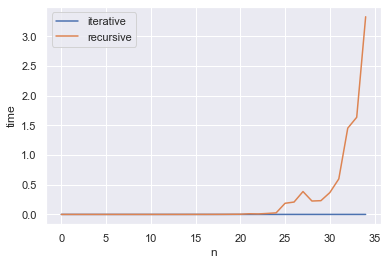

In [55]:
import time

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

values = range(35)
iterative_times = []
recursive_times = []
for value in values:
    b = time.time()
    val = iterative_fibonacci(value)
    e = time.time()
    iterative_times += [e - b] 

    b = time.time()
    val = recursive_fibonacci(value)
    e = time.time()
    recursive_times += [e - b] 

comparison_df = pd.DataFrame({"iterative": iterative_times, "recursive": recursive_times})

comparison_df.plot()
plt.xlabel("n")
plt.ylabel("time")
plt.show()

We see how the recursive approach does not scale well as the input gets bigger.

### 6. Implement a solution to the Tower of Hanoi using three stacks to keep track of the disks.